In [1]:
from transformers import pipeline

checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/Users/amaljoe/Desktop/Workspace/IITB/NLP/OCR_with_LLMs/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


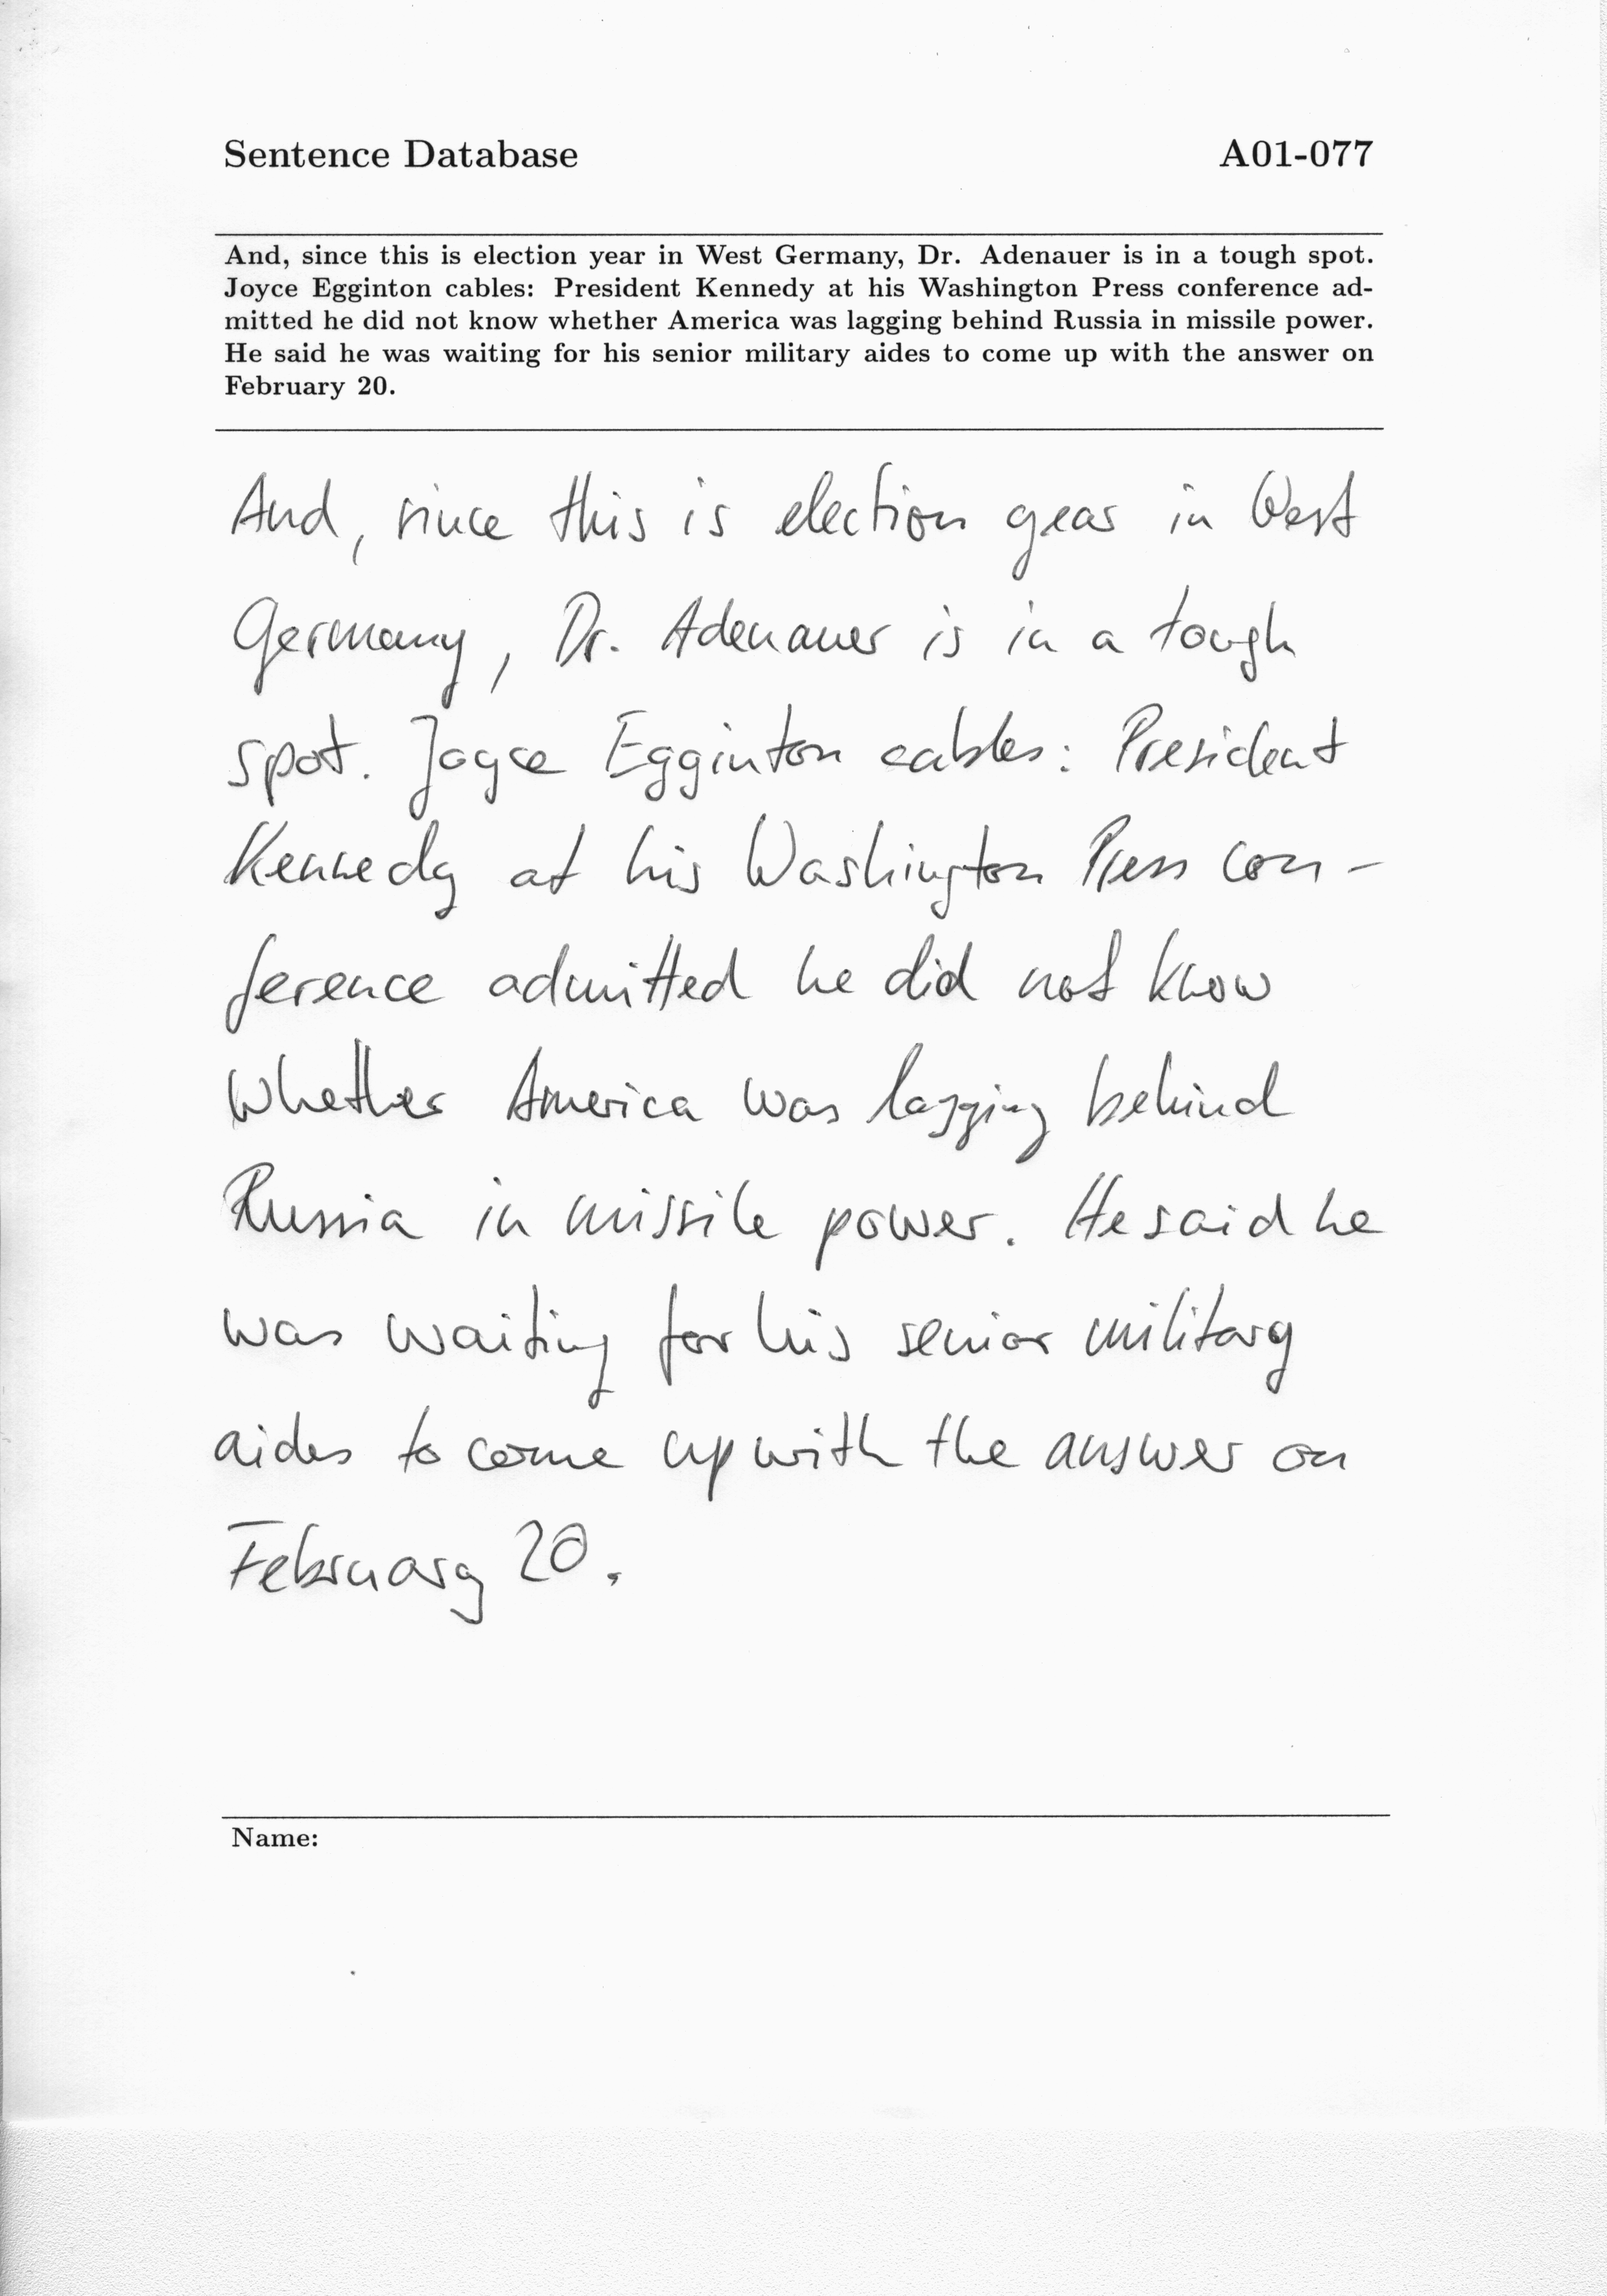

In [5]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
# image = Image.fromarray(np.uint8(image)).convert("RGB")
image = Image.open('data/iam_form.png')

image

In [8]:
predictions = detector(
    image,
    candidate_labels=["handwritten lines"],
)
predictions

[{'score': 0.2958401143550873,
  'label': 'handwritten lines',
  'box': {'xmin': 274, 'ymin': 2787, 'xmax': 2156, 'ymax': 2818}},
 {'score': 0.14714539051055908,
  'label': 'handwritten lines',
  'box': {'xmin': 338, 'ymin': 1431, 'xmax': 2101, 'ymax': 1580}},
 {'score': 0.13590779900550842,
  'label': 'handwritten lines',
  'box': {'xmin': 328, 'ymin': 1790, 'xmax': 2132, 'ymax': 1951}},
 {'score': 0.12607674300670624,
  'label': 'handwritten lines',
  'box': {'xmin': 308, 'ymin': 703, 'xmax': 2167, 'ymax': 867}},
 {'score': 0.12462744861841202,
  'label': 'handwritten lines',
  'box': {'xmin': 336, 'ymin': 1631, 'xmax': 2106, 'ymax': 1762}},
 {'score': 0.11622877418994904,
  'label': 'handwritten lines',
  'box': {'xmin': 366, 'ymin': 1059, 'xmax': 2084, 'ymax': 1225}},
 {'score': 0.11409734189510345,
  'label': 'handwritten lines',
  'box': {'xmin': 344, 'ymin': 1422, 'xmax': 2135, 'ymax': 1581}},
 {'score': 0.11026442795991898,
  'label': 'handwritten lines',
  'box': {'xmin': 312,

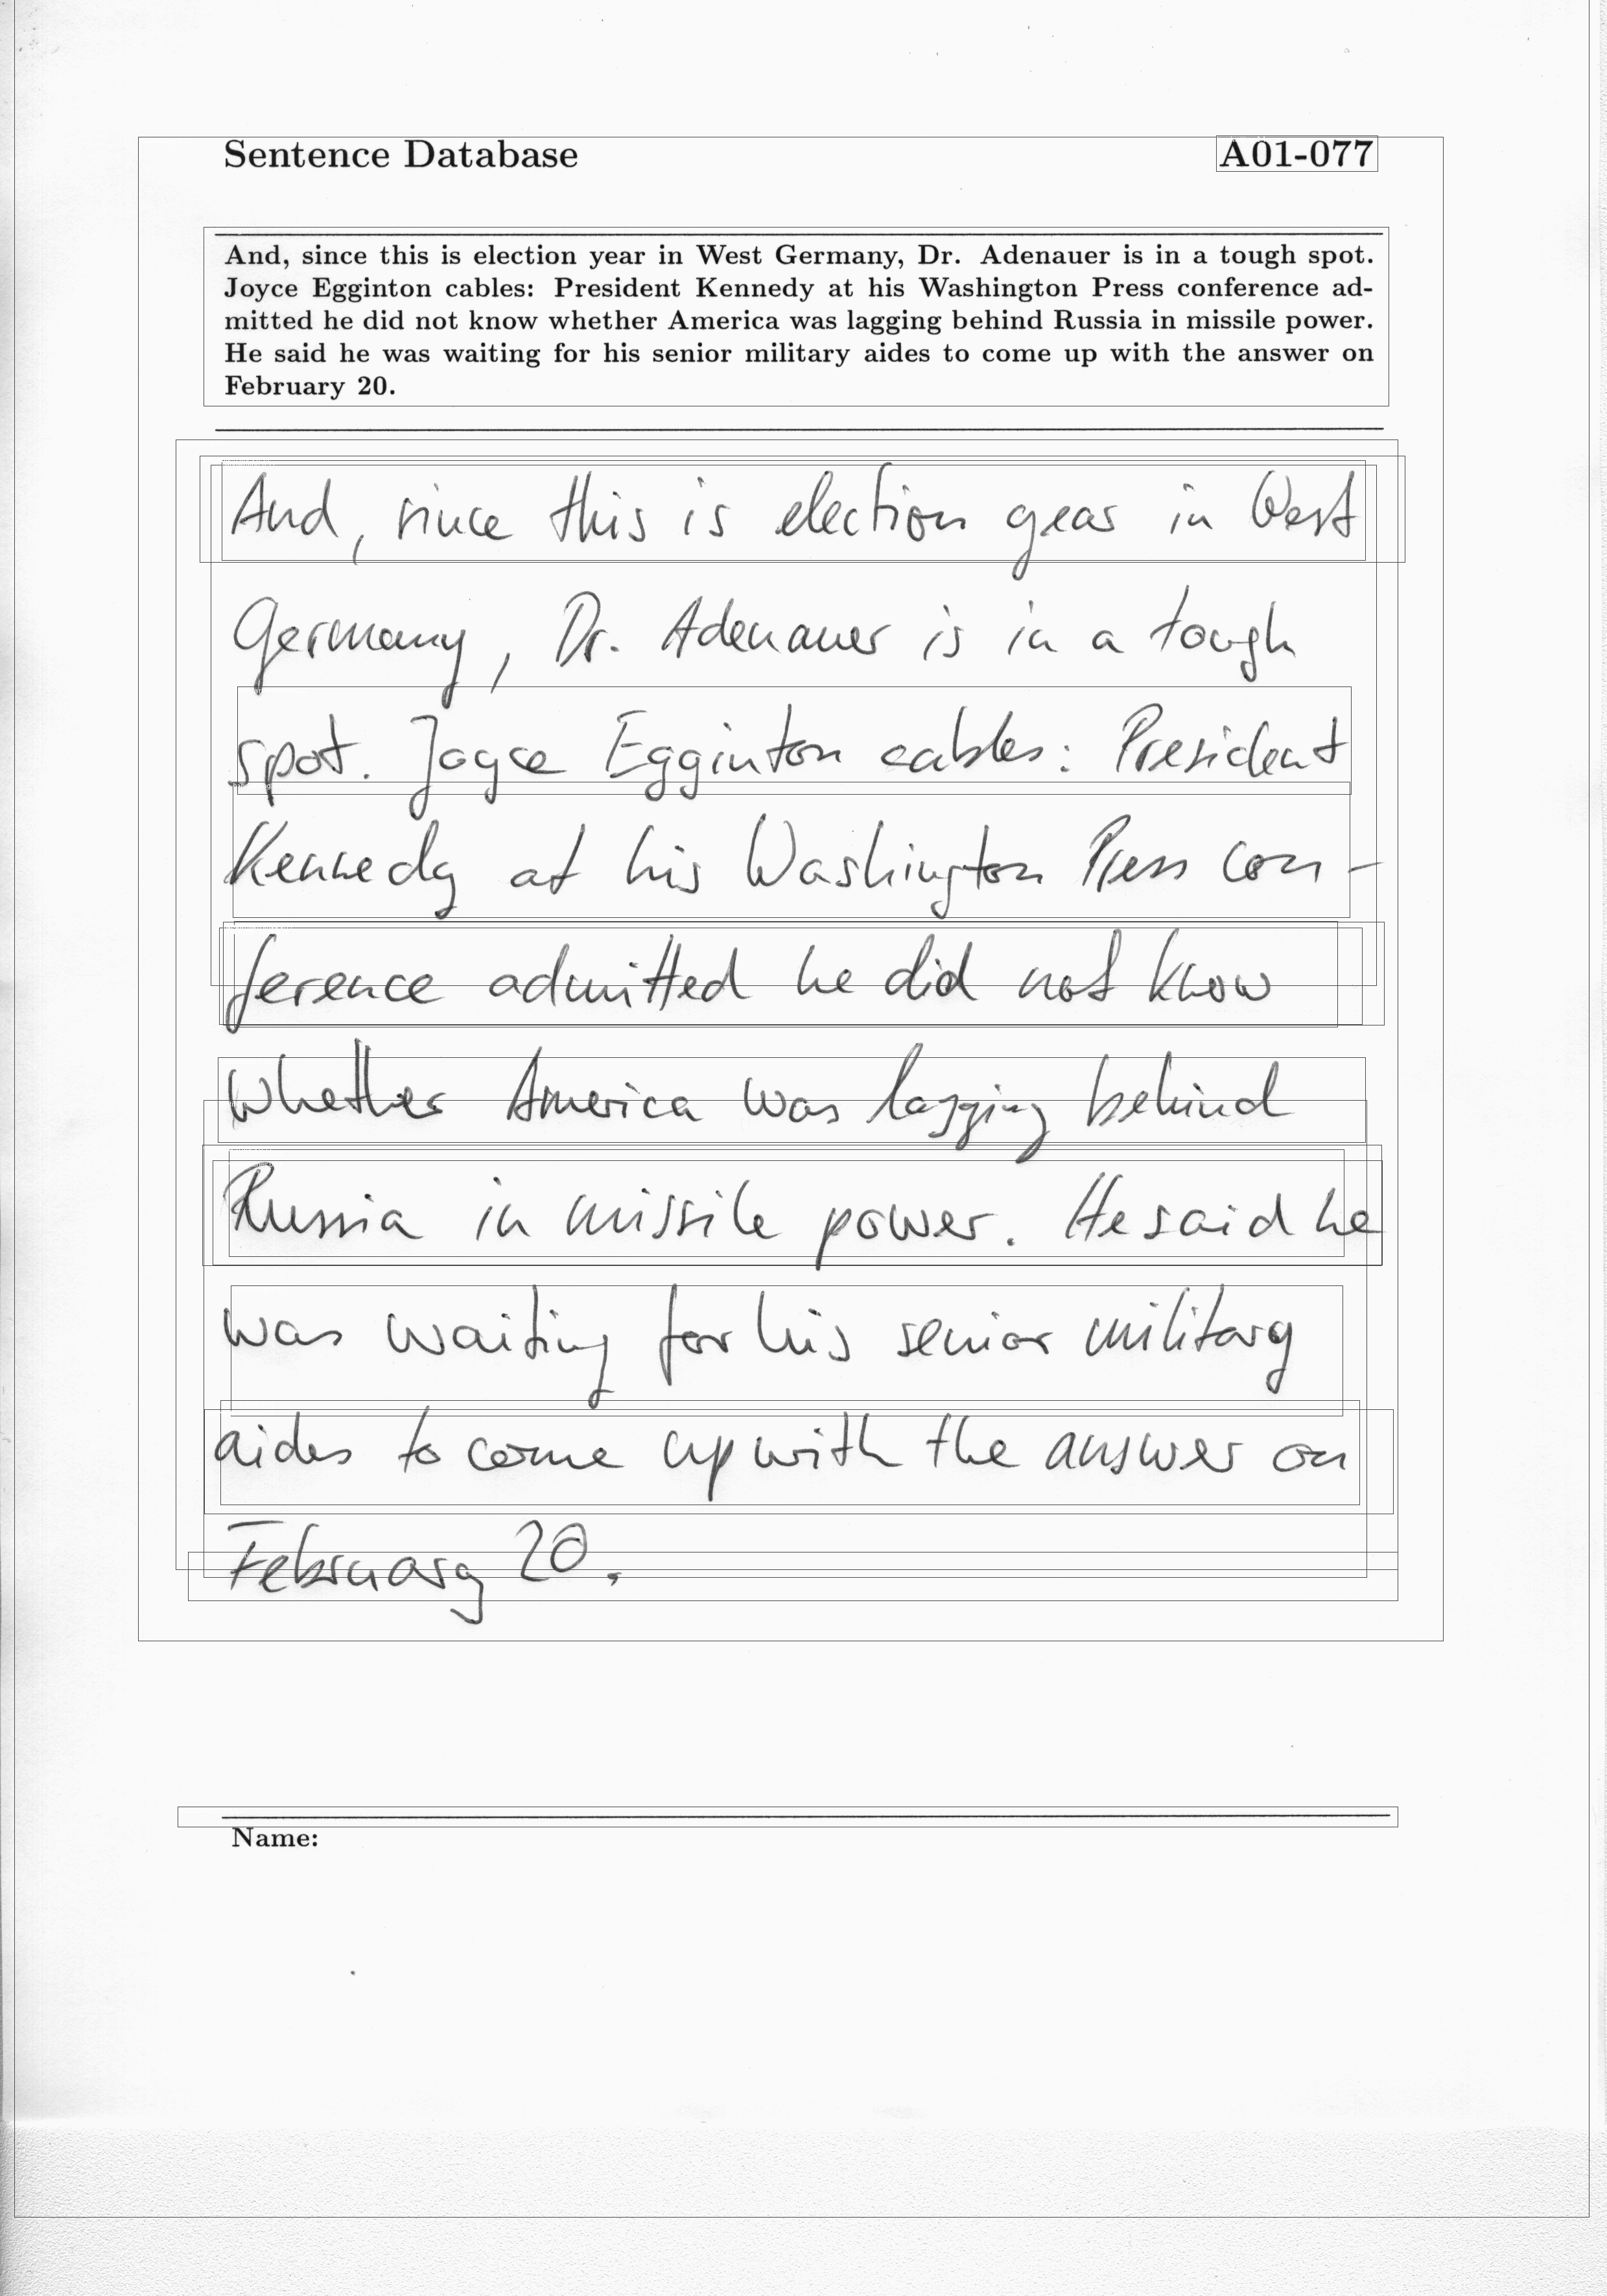

In [9]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image